# Desafio - Regrassão Linear

Com base no módulo de Regressão Linear Simples, deve-se analisar o seguinte conjunto de dados disponível no link:

[Dados de Irrigação](https://docs-rocketseat.notion.site/signed/https%3A%2F%2Fprod-files-secure.s3.us-west-2.amazonaws.com%2F08f749ff-d06d-49a8-a488-9846e081b224%2F1da32bce-9364-495d-90fa-bb4e1dec6515%2Fdados_de_irrigacao.csv?table=block&id=aee3b421-5b1e-4fe3-b55c-74e3e25ce713&spaceId=08f749ff-d06d-49a8-a488-9846e081b224&name=dados_de_irrigacao.csv&cache=v2)

Este conjunto de dados contém informações sobre horas de irrigação e área irrigada ao longo de um período de tempo.

O objetivo deste desafio é analisar e extrair as informações:

1. **Carregar e Visualizar os Dados:**
   - Carregue os dados de irrigação a partir de um arquivo CSV.  
   - Visualize os dados para entender a estrutura e as variáveis disponíveis.

2. **Análise Exploratória dos Dados (EDA):**
   - Calcule as estatísticas descritivas das variáveis.  
   - Crie gráficos de dispersão para visualizar a relação entre as horas de irrigação e a área irrigada por ângulo.  
   - Analise a correlação entre as variáveis.  

3. **Construção do Modelo de Regressão Linear:**
   - Divida os dados em conjuntos de treino e teste.  
   - Treine um modelo de regressão linear utilizando as horas de irrigação como variável independente (X) e a área irrigada por ângulo como variável dependente (Y).  
   - Imprima a equação da reta obtida pelo modelo.  

4. **Avaliação do Modelo:**
   - Utilize as métricas de desempenho (MSE, MAE) para avaliar a precisão do modelo.  
   - Visualize os resultados reais e preditos em um gráfico.  

5. **Análise de Resíduos:**
   - Calcule e analise os resíduos do modelo.  
   - Verifique a normalidade dos resíduos utilizando testes estatísticos e gráficos.  

6. **Predições de Exemplo:**
   - Utilize o modelo para fazer predições.  
   - Exemplo: preveja a área irrigada por ângulo para 15 horas de irrigação.  


In [1]:
# Importa pacotes de sistema

import os

In [26]:
# Pacotes e bibliotecas Matemáticos e Estatísticos

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv

In [27]:
# Pacotes e bibliotecas de Aprendizado de Máquina
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import shapiro, kstest, probplot
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
import pingouin as pg

## Carregando os dados

In [3]:
# Usa-se a função pd.read_csv() para carregar o arquivo csv
path_to_file = os.path.join("dataset", "dados_de_irrigacao.csv")

df = pd.read_csv(path_to_file)

In [4]:
# Exibe as primeiras linhas do dataframe
df.head()

,Horas de Irrigação,Área Irrigada,Área Irrigada por Ângulo
0,1,100,66.666667
1,2,200,133.333333
2,3,300,200.000000
3,4,400,266.666667
4,5,500,333.333333


In [ ]:
# Exibe as últimas linhas do dataframe
df.tail()

## Realizar a Análise Exploratória de Dados (EDA)

In [5]:
# Obter tipos de dados disponíveis para as colunas do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Horas de Irrigação        299 non-null    int64  
 1   Área Irrigada             299 non-null    int64  
 2   Área Irrigada por Ângulo  299 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 7.1 KB


In [6]:
# Estatísticas descritivas das variáveis
df.describe()

,Horas de Irrigação,Área Irrigada,Área Irrigada por Ângulo
count,299.000000,299.000000,299.000000
mean,150.000000,15000.000000,10000.000000
std,86.458082,8645.808233,5763.872155
min,1.000000,100.000000,66.666667
25%,75.500000,7550.000000,5033.333333
50%,150.000000,15000.000000,10000.000000
75%,224.500000,22450.000000,14966.666667
max,299.000000,29900.000000,19933.333333


In [7]:
# Verificar o tamanho da base de dados
print(df.shape)
# Verificar dados nulos
print(df.isnull().sum())
# Verificar dados NaN
print(df.isna().sum())

(299, 3)
Horas de Irrigação          0
Área Irrigada               0
Área Irrigada por Ângulo    0
dtype: int64
Horas de Irrigação          0
Área Irrigada               0
Área Irrigada por Ângulo    0
dtype: int64


<Axes: xlabel='Horas de Irrigação', ylabel='Count'>

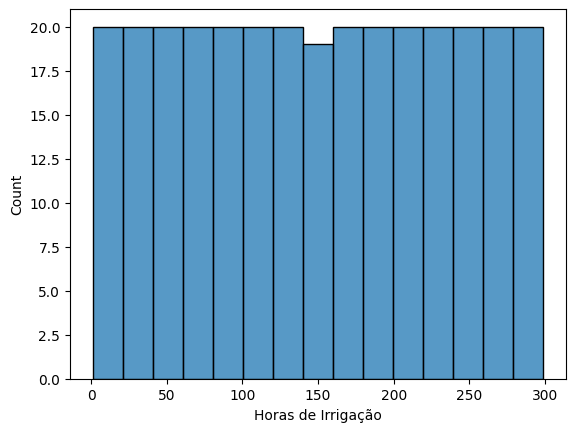

In [15]:
# Visualização Gráfica da distribuição dos dados em histograma
sns.histplot(df['Horas de Irrigação'], bins=15)

- A distribuição das horas de irrigação segue uma distribuição uniforme

<Axes: xlabel='Área Irrigada', ylabel='Count'>

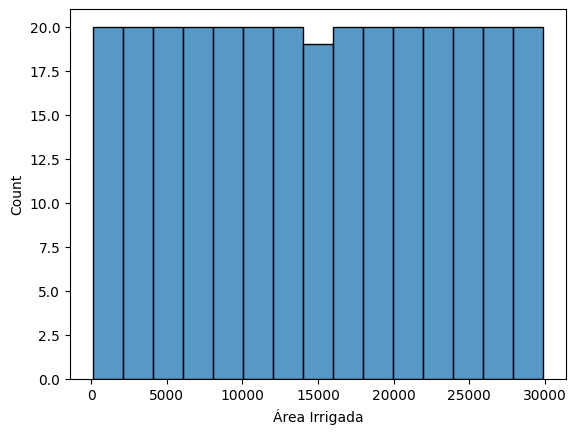

In [16]:
# Visualização Gráfica da distribuição dos dados em histograma
sns.histplot(df['Área Irrigada'], bins=15)

- A distribuição da área irrigada segue uma distribuição uniforme, é muito semelhante às horas de irrigação, o que sugere forte correlação.

<Axes: xlabel='Área Irrigada por Ângulo', ylabel='Count'>

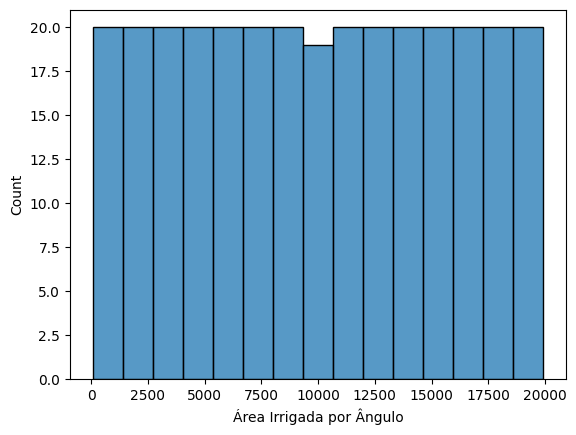

In [17]:
# Visualização Gráfica da distribuição dos dados em histograma
sns.histplot(df['Área Irrigada por Ângulo'], bins=15)

- A distribuição da área irrigado por ângulo segue uma distribuição uniforme, como as anteriores.

<Axes: >

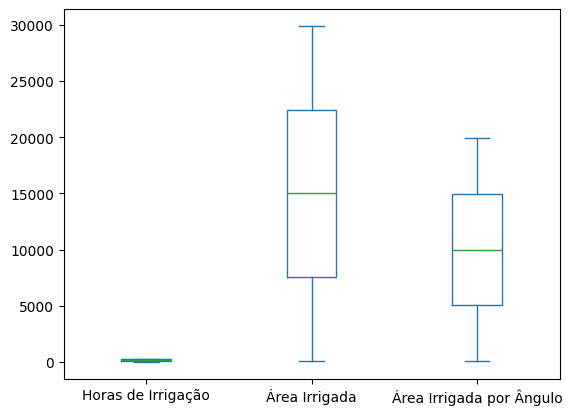

In [9]:
# Visualização Gráfica da distribuição dos dados em histograma
df.plot.box()

- Persebe-se um fator multiplicativo de módulo igual a 100 entre "Horas de Irrigação" e "Área Irrigada". Há também um fator de 2/3 entre "Área Irrigada" e "Área Irrigada por Ângulo".

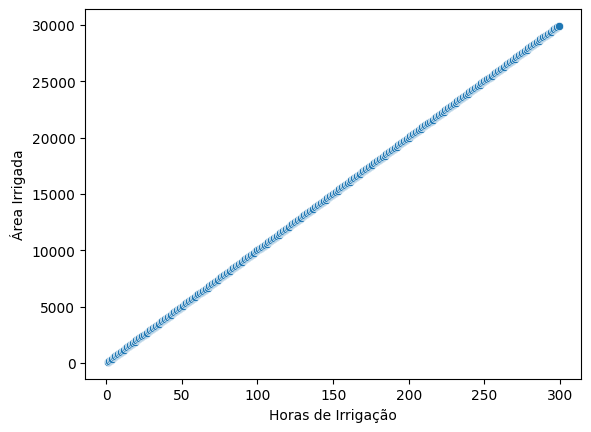

In [18]:
# Plot de Dispersão
sns.scatterplot(x='Horas de Irrigação', y='Área Irrigada', data=df)
plt.show()

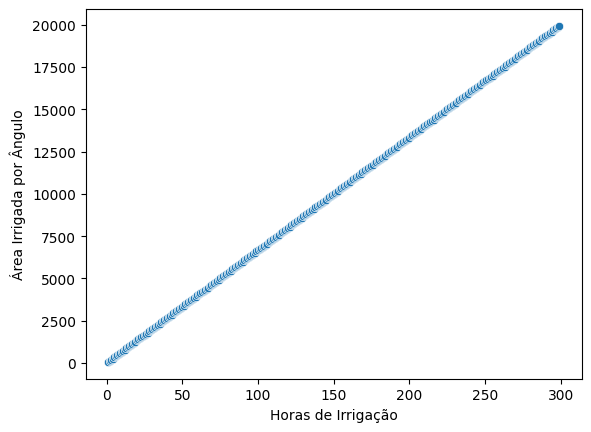

In [19]:
# Plot de Dispersão
sns.scatterplot(x='Horas de Irrigação', y='Área Irrigada por Ângulo', data=df)
plt.show()

<Axes: >

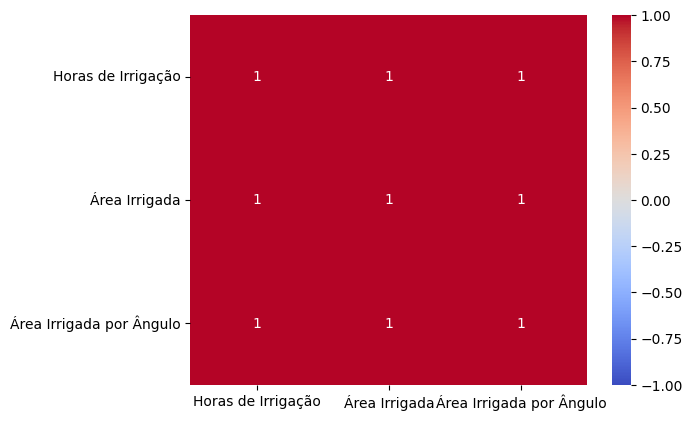

In [20]:
# Verificar a correlação dos dados - Pearson
sns.heatmap(df.corr('pearson'), cmap='coolwarm', annot=True, vmin=-1, vmax=1)

<Axes: >

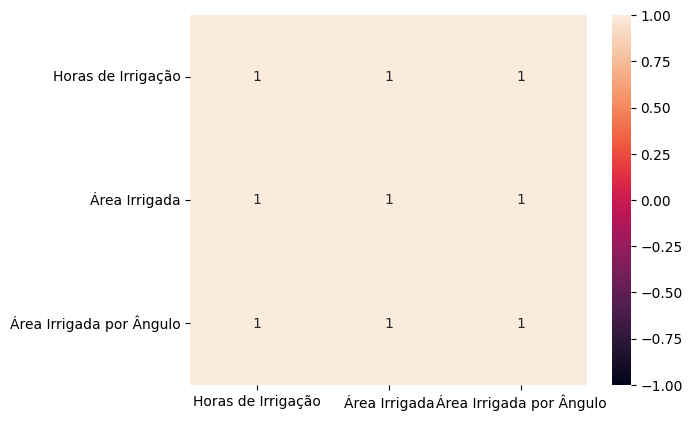

In [21]:
# Verificar a correlação dos dados - Spearman
sns.heatmap(df.corr('spearman'), annot=True, vmin=-1, vmax=1)

## Treinar o Modelo de Regrassão Linear

In [48]:
# Dividir dataset entre treino e teste
# X é a variável independente
X = df['Horas de Irrigação'].values.reshape(-1, 1)
# Y é a variável dependente
y = df['Área Irrigada'].values.reshape(-1, 1)
y_ang = df['Área Irrigada por Ângulo'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)
X_train_ang, X_test_ang, y_train_ang, y_test_ang = train_test_split(X, y_ang, test_size=0.3, random_state=50)

In [50]:
# Instanciar o modelo de Regressão Linear
modelo = LinearRegression()
modelo_ang = LinearRegression()

# Treinar o modelo
modelo.fit(X_train, y_train)
modelo_ang.fit(X_train_ang, y_train_ang)

# Prever os valores
y_pred = modelo.predict(X_test)
y_pred_ang = modelo_ang.predict(X_test_ang)

In [51]:
# Imprimir a equação da reta
# y = aX + b
print("A equação da reta é: y = {:4f}x + {:4f}".format(modelo.coef_[0][0], modelo.intercept_[0]))
print("A equação da reta ang é: y = {:4f}x + {:4f}".format(modelo_ang.coef_[0][0], modelo_ang.intercept_[0]))

A equação da reta é: y = 100.000000x + -0.000000
A equação da reta ang é: y = 66.666667x + -0.000000


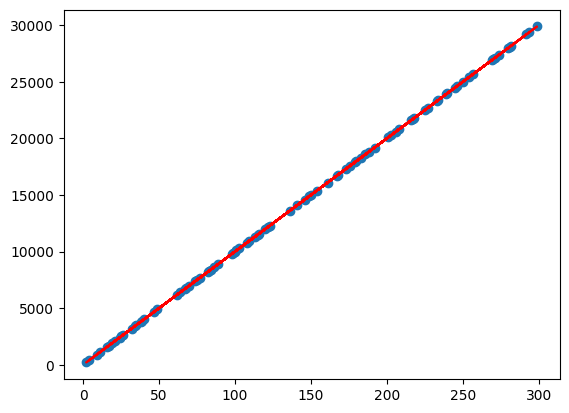

In [31]:
# Plotar a reta de regressão
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red')
plt.show()
# Análise de Resíduos
# Calcular resíduos
residuos = y_test - y_pred
# Calcular os resíduos padronizados (standardization)

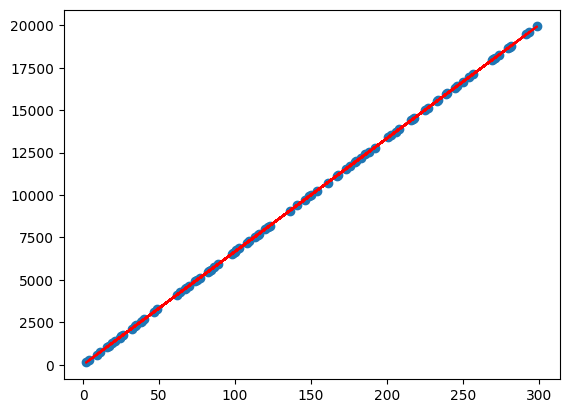

In [52]:
# Plotar a reta de regressão
plt.scatter(X_test_ang, y_test_ang)
plt.plot(X_test_ang, y_pred_ang, color='red')
plt.show()
# Análise de Resíduos
# Calcular resíduos
residuos = y_test_ang - y_pred_ang

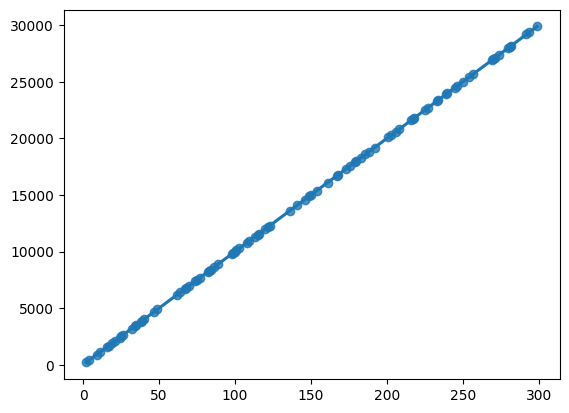

In [ ]:
# Plot do seaborn para visualizar a reta de regressão
sns.regplot(x=X_test, y=y_test)
plt.show()

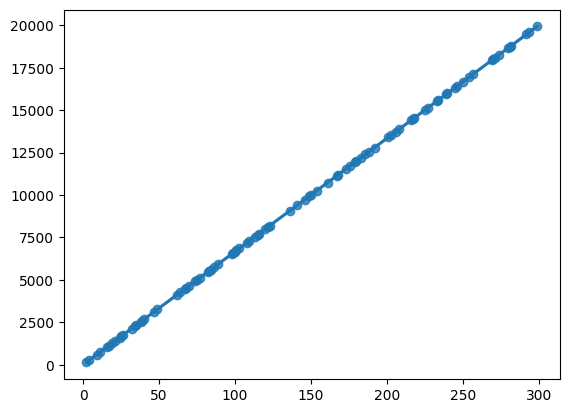

In [53]:
# Plot do seaborn para visualizar a reta de regressão
sns.regplot(x=X_test_ang, y=y_test_ang)
plt.show()

## Validar o modelo - Métricas

In [54]:
# Prever os valores
y_pred = modelo.predict(X_test)
y_pred_ang = modelo_ang.predict(X_test_ang)

In [56]:
# Calcular métrica $-squared ou Coeficiente de Determinação
# R2 representa a proporção na variação da variável dependente que é previsível a partir da variável independente
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print(r2_score(y_test, y_pred))
print(r2_score(y_test_ang, y_pred_ang))

1.0
1.0


In [57]:
# Calcular o erro médio absoluto (MAE)
print(mean_absolute_error(y_test, y_pred))
print(mean_absolute_error(y_test_ang, y_pred_ang))

1.913096841437639e-12
1.6854073692229576e-12


In [58]:
# Calcular métrica MSE (Mean Squared Error)
print(mean_squared_error(y_test, y_pred))
print(mean_squared_error(y_test_ang, y_pred_ang))

7.416083473611812e-24
5.149387798308218e-24


In [59]:
# Calcular métrica RMSE (Root Mean Squared Error)
print(np.sqrt(mean_squared_error(y_test, y_pred)))
print(np.sqrt(mean_squared_error(y_test_ang, y_pred_ang)))

2.7232486984504025e-12
2.2692262554245704e-12


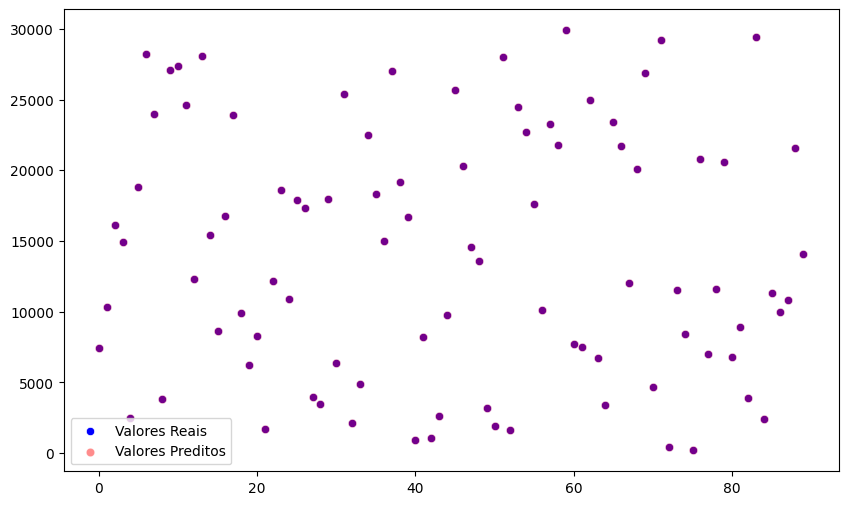

In [66]:
# Análise Gráfica
x_axis = range(len(y_test))
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x_axis, y=y_test.reshape(-1), color='blue', label='Valores Reais')

sns.scatterplot(x=x_axis, y=y_pred.reshape(-1), color='red', alpha=0.45, label='Valores Preditos')

plt.legend()
plt.show()

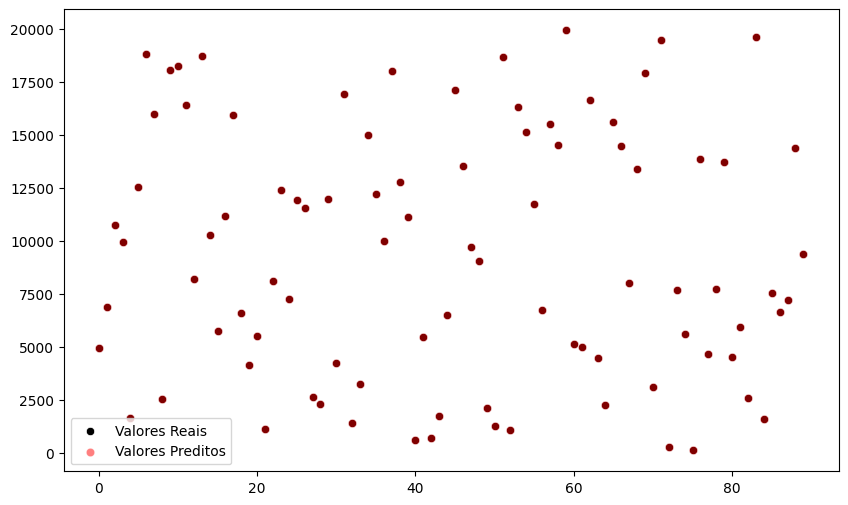

In [68]:
# Análise Gráfica
x_axis = range(len(y_test_ang))
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x_axis, y=y_test_ang.reshape(-1), color='black', label='Valores Reais')

sns.scatterplot(x=x_axis, y=y_pred_ang.reshape(-1), color='red', alpha=0.5, label='Valores Preditos')

plt.legend()
plt.show()

## Análise de Resíduos

In [72]:
# Calcular resíduos
residuos = y_test - y_pred
print("Resíduos da Área Irrigada:\n", residuos)
residuos_ang = y_test_ang - y_pred_ang
print("Resíduos da Área Irrigada por Ângulo:\n", residuos_ang)

Resíduos da Área Irrigada:
 [[3.63797881e-12]
 [1.81898940e-12]
 [0.00000000e+00]
 [1.81898940e-12]
 [4.54747351e-12]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [4.54747351e-12]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [1.81898940e-12]
 [0.00000000e+00]
 [1.81898940e-12]
 [3.63797881e-12]
 [0.00000000e+00]
 [0.00000000e+00]
 [1.81898940e-12]
 [3.63797881e-12]
 [3.63797881e-12]
 [5.00222086e-12]
 [1.81898940e-12]
 [0.00000000e+00]
 [1.81898940e-12]
 [0.00000000e+00]
 [0.00000000e+00]
 [4.54747351e-12]
 [4.54747351e-12]
 [0.00000000e+00]
 [3.63797881e-12]
 [0.00000000e+00]
 [5.00222086e-12]
 [3.63797881e-12]
 [0.00000000e+00]
 [0.00000000e+00]
 [1.81898940e-12]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [5.22959454e-12]
 [3.63797881e-12]
 [5.22959454e-12]
 [4.54747351e-12]
 [1.81898940e-12]
 [0.00000000e+00]
 [0.00000000e+00]
 [1.81898940e-12]
 [1.81898940e-12]
 [4.54747351e-12]
 [5.00222086e-12]
 [0.00000000e+00]
 [5.00222086e-12]
 [0.00000000e+00]


In [73]:
# Calcular os resíduos padronizados (standardization)
from scipy.stats import zscore
residuos_padronizados = zscore(residuos)
residuos_padronizados_ang = zscore(residuos_ang)

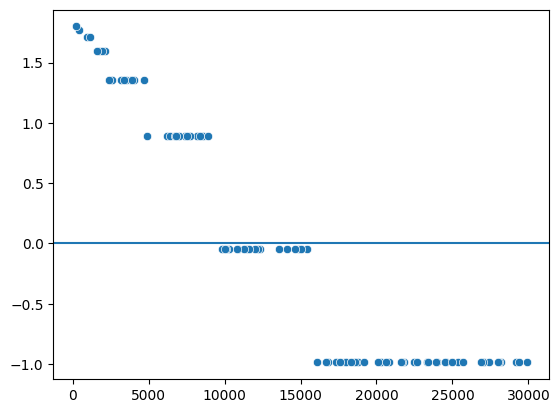

In [74]:
# Verificar linearidade do modelo:
# Se os resíduos padronizados estiverem entre -2 e 2, o modelo é linear

# Verificar a homogeneidade das variâncias (Homocedasticidade)
# Valores estiverem em torno da reta, temos homocedasticidade, caso contrário, heterocedasticidade

sns.scatterplot(x=y_pred.reshape(-1), y=residuos_padronizados.reshape(-1))
plt.axhline(y=0)

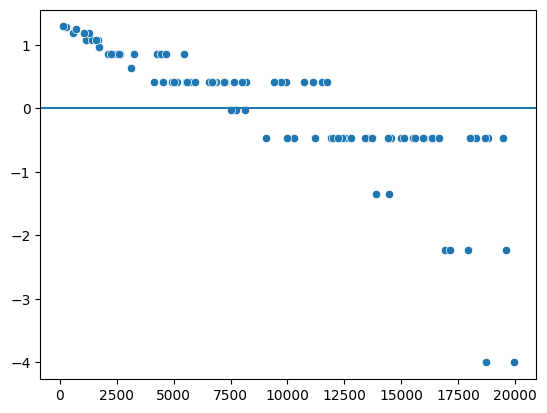

In [75]:
# Verificar linearidade do modelo:
# Se os resíduos padronizados estiverem entre -2 e 2, o modelo é linear

# Verificar a homogeneidade das variâncias (Homocedasticidade)
# Valores estiverem em torno da reta, temos homocedasticidade, caso contrário, heterocedasticidade

sns.scatterplot(x=y_pred_ang.reshape(-1), y=residuos_padronizados_ang.reshape(-1))
plt.axhline(y=0)

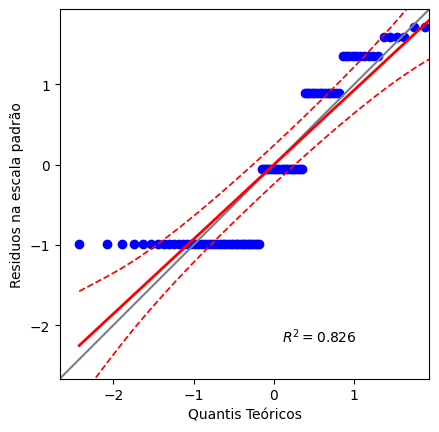

In [42]:
# Checar se os resíduos seguem uma distribuição normal
# QQ (Quantile-Quantile) Plot que avalia se os resíduos seguem uma distribuição normal
pg.qqplot(residuos_padronizados, dist='norm', confidence=0.95)
plt.xlabel('Quantis Teóricos')
plt.ylabel('Residuos na escala padrão')
plt.show()

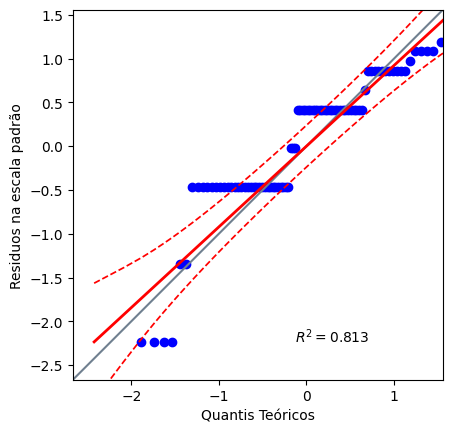

In [80]:
# Checar se os resíduos seguem uma distribuição normal
# QQ (Quantile-Quantile) Plot que avalia se os resíduos seguem uma distribuição normal
pg.qqplot(residuos_padronizados_ang, dist='norm', confidence=0.95)
plt.xlabel('Quantis Teóricos')
plt.ylabel('Residuos na escala padrão')
plt.show()

In [44]:
# Teste de Shapiro-Wilk
# H0 <- segue distribuição normal
# H1 <- não segue distribuição normal
# se o p-valor > 0.05, não rejeitamos H0, caso contrário, rejeitamos H0
stat_shapiro, p_valor_shapiro = shapiro(residuos.reshape(-1))
print("Estatística de teste: {} e P-Valor: {}".format(stat_shapiro, p_valor_shapiro))

Estatística de teste: 0.8152012438137821 e P-Valor: 2.9943343577492684e-09


In [82]:
# Teste de Shapiro-Wilk
# H0 <- segue distribuição normal
# H1 <- não segue distribuição normal
# se o p-valor > 0.05, não rejeitamos H0, caso contrário, rejeitamos H0
stat_shapiro_ang, p_valor_shapiro_ang = shapiro(residuos_ang.reshape(-1))
print("Estatística de teste: {} e P-Valor: {}".format(stat_shapiro_ang, p_valor_shapiro_ang))

Estatística de teste: 0.8172696879209803 e P-Valor: 3.4725200145985586e-09


In [45]:
# Teste de Kolmogorov-Smirnov
# H0 <- segue distribuição normal
# H1 <- não segue distribuição normal
# se o p-valor > 0.05, não rejeitamos H0, caso contrário, rejeitamos H0
stat_ks, p_valor_ks = kstest(residuos.reshape(-1), 'norm')
print("Estatística de teste: {} e P-Valor: {}".format(stat_ks, p_valor_ks))

Estatística de teste: 0.5 e P-Valor: 2.4869515015725988e-21


In [83]:
# Teste de Kolmogorov-Smirnov
# H0 <- segue distribuição normal
# H1 <- não segue distribuição normal
# se o p-valor > 0.05, não rejeitamos H0, caso contrário, rejeitamos H0
stat_ks_ang, p_valor_ks_ang = kstest(residuos_ang.reshape(-1), 'norm')
print("Estatística de teste: {} e P-Valor: {}".format(stat_ks_ang, p_valor_ks_ang))

Estatística de teste: 0.49999999999856004 e P-Valor: 2.486951502308412e-21


## Fazer predições com o modelo

In [86]:
# Se a irrigação for aplicada por 15 horas, qual área será irrigada?
print(modelo.predict([[15], [32]]))
print(modelo_ang.predict([[15], [32]]))

[[1500.]
 [3200.]]
[[1000.        ]
 [2133.33333333]]
